# Введение в автоматическую обработку текста.

### __Регулярные выражения__

__*Классы символов:*__

__[A-Z]__ - символы верхнего регистра (латиница)

__[a-z]__ - символы нижнего регистра (латиница)

__[А-Я]__ - символы верхнего регистра (кириллица)

__[а-я]__ - символы нижнего регистра (кириллица)

__[0-9]__ или \d - цифра

__[^0-9]__ или \D - любой символ, кроме цифры

__.__ - любой символ

__*Служебные символы:*__

__\t__ - табуляция

__\s__ - любой пробельный символ

__\S__ - все символы, кроме пробельных

__\n__  - перенос строки

__^__ - начало строки

__$__ - конец строки

__*Операторы:*__

__?__ - предыдущий символ/группа может быть, а может не быть

__+__ - предыдущий символ/группа может повторяться 1 и более раз

__*__ - предыдущий символ/группа может повторяться 0 и более раз

__{n,m}__ - предыдущий символ/группа может повторяться от от n до m включительно

__{n,}__ - предыдущий символ/группа в скобках может повторяться n и более раз

__{,m}__ - предыдущий символ/группа может повторяться до m раз

__{n}__ - предыдущий символ/группа повторяется n раз

Внутри групп не работают операторы __.__, __+__, __*__, их необходимо экранировать с помощью обратного слеша: \


__*Методы:*__

__re.match(pattern, string)__ - найти подстроку pattern в начале строки string


In [2]:
import re

m = re.match(r'рыбак', 'рыбак рыбака видит издалека')

print(m)
print(m.group(0))
print(m.start(), m.end())

l = re.match(r'видит', 'рыбак рыбака видит издалека')
print(l)

<_sre.SRE_Match object; span=(0, 5), match='рыбак'>
рыбак
0 5
None



__re.search(pattern, string)__ - аналогичен методу match, но ищет не только в начале строки (но возвращает только первое вхождение!)



In [22]:
m = re.search(r'издалека', 'рыбак рыбака видит издалека')

print(m)
print(m.group(0))
print(m.start(), m.end())

l = re.search(r'прорубь', 'рыбак рыбака видит издалека')
print(l)

<_sre.SRE_Match object; span=(19, 27), match='издалека'>
издалека
19 27
None


__re.findall(pattern, string)__ -  возвращает все вхождения pattern в string в виде списка



In [24]:
m = re.findall(r'рыбак', 'рыбак рыбака видит издалека')

print(m)

l = re.findall(r'прорубь', 'рыбак рыбака видит издалека')
print(l)

['рыбак', 'рыбак']
[]


__re.split(pattern, string, [maxsplit=0])__ - разделяет строку string по шаблону pattern; параметр maxsplit отвечает за максимальное количество разбиений (если их существует несколько).



In [3]:
m = re.split(r'видит', 'рыбак рыбака видит издалека')

print(m)

l = re.split(r'рыбак', 'рыбак рыбака видит издалека')
print(l, len(l))

l1 = re.split(r'рыбак', 'рыбак рыбака видит издалека',maxsplit=1)
print(l1, len(l1))

['рыбак рыбака ', ' издалека']
['', ' ', 'а видит издалека'] 3
['', ' рыбака видит издалека'] 2


__re.sub(pattern, string2, string1)__ - заменяет все вхождения pattern в string1 на srting2



In [6]:
m = re.sub(r'рыбак', 'Рыбак', 'рыбак рыбака видит издалека')

print(m)

Рыбак Рыбака видит издалека


__re.compile(pattern)__ - создает объект для последующего поиска

In [7]:
prog = re.compile(r'рыбак')

m = prog.findall('рыбак рыбака видит издалека')

print(m)

['рыбак', 'рыбак']


In [8]:
prog = re.compile('[A-Я]') # поиск всех заглавныех букв в строке

m = prog.findall('Рыбак рыбака видит издалека. Всегда!')

print(m)

['Р', 'В']


__*Примеры:*__

In [18]:
prog = re.compile('[авекорсту]{1}[0-9]{3}[авекорсту]{2}') # регулярное выражение для поиска автомобильных
                                                          # номеров (русские буквы, совпадающие с латиницей)

s = 'у456ао, ы234ег, 99авто443'
print(s)
res = prog.findall(s)

print(*res)

у456ао, ы234ег, 99авто443
у456ао


In [43]:
# пример "жадных" операторов: ищем котов

s = 'кот котик компот'
res1 = re.findall(r'к.*т', s)
print(res1)

res2 = re.findall(r'к.*?т', s)
print(res2)

res3 = re.findall(r'к[\S]*?т', s)
print(res3)

res4 = re.findall(r'кот.*\s', s)
print(res4)

['кот котик компот']
['кот', 'кот', 'к компот']
['кот', 'кот', 'компот']
['кот котик ']


### __Задание 1:__

Найдите в тексте все номера телефонов; текст лежит в файле 'task1.txt'. Обратите внимание на возможные форматы написания номеров.

In [3]:
import re

with open ('task1.txt') as f:
    phones = f.read()
    
print(phones)

#здесь Ваш код

Гарантируется, что в номере 8 цифр и он отделен пробелом, но форматы написания могут отличаться:


89268659970	Анна
8(495)3451212	Алексей Иванин
Автомастерская	+7(234)456-78-90
8(956)234-23-23	соседка 125 квартира
Офис, 5 этаж	85679962312 
Игорь		+7-845-344-23-65



In [ ]:
#решение

prog1 = re.compile('[+0-9\-\(\)]{8,}')
res = prog1.findall(phones)
print(*res, sep='\n')

### __Токенизация с помощью регулярных выражений__

In [1]:
text = '«Карты, деньги, два ствола» культовый фильм Гая Ричи. Эта картина покорила сначала Британию, затем Америку, а потом и весь мир. Никому неизвестный режиссер Гай Ричи, у которого за плечами были только коротметражка «Трудное дело», дешевые рекламные ролики и клипы, создал шедевр на все времена. Это именно тот случай, когда и критики, и зрители в восторге. Здесь очень много черного юмора и насилия, но это и делает фильм таким какой он есть. Хотя он и не стал лидером проката, он собрал множество наград и стал классикой. Но вернемся в прошлое и перенесемся за океан. В 1994 году вышел фильм «Криминальное чтиво» Квентина Тарантино. По слухам, как-то его спросили — «Квентин, вам не кажется, что вы не сняли ничего лучше Криминального чтива?», на что он ответил — «А кто снял?». Нет, не снял, но снимет через четыре года. Молодой и талантливый режиссер Гай Ричи заставит заговорить о себе весь мир. Со своей картиной «Карты, деньги, два ствола» он не только встанет на один уровень со своим голливудским коллегой Квентином Тарантино и его фильмом «Криминальное чтиво», но и превзойдет его. Впрочем, здесь достаточно трудно утверждать чей фильм лучше, а чей хуже: оба этих фильма гениальны, однако свое предпочтение я все же отдам Гаю Ричи. А теперь, после того, как я похвалила режиссера, можно перейти к самой картине. О ней только и можно сказать что она невероятна. Именно такой и видится криминальный мир Лондона. Здесь есть все составляющие для хорошего кино. Все актеры подобраны идеально и стоят на своем месте. Стоит ли говорить, что после этого фильма Джейсон Стэйтем проснулся звездой. Кроме потрясающей режиссерской работы, здесь ещё и отличный сценарий, написанный так же Гаем Ричи. Все диалоги настолько хороши, что во время просмотра хочется взять бумагу и ручку и записать их. Так же к диалогам подобрано отличное музыкальное сопровождение. С первых минут фильм кажется ничем не примечательным, и думаешь почему же все считают его культовым. Но потом происходит что-то нереальное. Этот фильм настолько притягивает к себе, что оторваться просто невозможно, настолько интересно наблюдать, как сюжетные линии переплетаются между собой. После просмотра «Карты, деньги, два ствола», просто сидишь в оцепенении и думаешь «Черт возьми, что это было? И хочу ещё!» Безусловно, Гай Ричи создал культовое кино, которое хочется смотреть и пересматривать.'

print(text)

«Карты, деньги, два ствола» культовый фильм Гая Ричи. Эта картина покорила сначала Британию, затем Америку, а потом и весь мир. Никому неизвестный режиссер Гай Ричи, у которого за плечами были только коротметражка «Трудное дело», дешевые рекламные ролики и клипы, создал шедевр на все времена. Это именно тот случай, когда и критики, и зрители в восторге. Здесь очень много черного юмора и насилия, но это и делает фильм таким какой он есть. Хотя он и не стал лидером проката, он собрал множество наград и стал классикой. Но вернемся в прошлое и перенесемся за океан. В 1994 году вышел фильм «Криминальное чтиво» Квентина Тарантино. По слухам, как-то его спросили — «Квентин, вам не кажется, что вы не сняли ничего лучше Криминального чтива?», на что он ответил — «А кто снял?». Нет, не снял, но снимет через четыре года. Молодой и талантливый режиссер Гай Ричи заставит заговорить о себе весь мир. Со своей картиной «Карты, деньги, два ствола» он не только встанет на один уровень со своим голливудс

In [4]:
prog = re.compile('[А-Яа-я\-]+')
tokens = prog.findall(text.lower())
print(' '.join(tokens[:10]))

карты деньги два ствола культовый фильм гая ричи эта картина


### __Сегментация предложений__

In [5]:
from nltk.tokenize import sent_tokenize

text1 = 'Первое предложение. Второе предложение! И, наконец, третье?'
sents = sent_tokenize(text1)

print(len(sents))
print(*sents, sep='\n')

3
Первое предложение.
Второе предложение!
И, наконец, третье?


### __Частотный анализ текста__

10 самых частых слов (токенов):

In [6]:
import nltk

d1 = nltk.FreqDist(tokens) # частотный словарь для текста
d1.most_common(10) # токен и кол-во его появлений в тексте

[('и', 22),
 ('что', 7),
 ('фильм', 6),
 ('ричи', 6),
 ('все', 6),
 ('не', 6),
 ('он', 5),
 ('но', 5),
 ('в', 4),
 ('здесь', 4)]

Распределение длин слов в тексте:

In [7]:
d2 = nltk.FreqDist(len(w) for w in tokens)  

print(d2)  
print(d2.most_common(5)) # 5 самых частых длин слов
print(d2.freq(d2.max())) # как часто они встречаются в тексте

<FreqDist with 14 samples and 363 outcomes>
[(5, 56), (3, 46), (6, 41), (1, 39), (7, 38)]
0.15426997245179064


### __Задание 2:__

1. Посчитайте, сколько слов в тексте про Гая Ричи встречается больше 3 раз.
2. Посчитайте количество слов, состоящих из 5 букв и более.

In [26]:
# решение 1

prog = re.compile('[А-Яа-я\-]+')
tokens = prog.findall(text.lower())
d1 = nltk.FreqDist(tokens)

res = [i for i in d1.most_common() if i[1] > 3]
print(*res, sep='\n')
print(len(res))

('и', 22)
('что', 7)
('фильм', 6)
('ричи', 6)
('все', 6)
('не', 6)
('он', 5)
('но', 5)
('в', 4)
('здесь', 4)
('на', 4)
('а', 4)
('его', 4)
('же', 4)
14


In [30]:
# решение 2

res = [i for i in tokens if len(i) > 5]
print(len(res))

154


### __Лемматизация текста__

In [82]:
sent = 'Безусловно, Гай Ричи создал культовое кино, которое хочется смотреть и пересматривать.'

Pymorphy:

In [83]:
%%time
from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()
lemmas1 = [m.parse(word)[0].normal_form for word in sent.split()]
print(' '.join(lemmas1))

безусловно, гай ричать создать культовый кино, который хотеться смотреть и пересматривать.
CPU times: user 104 ms, sys: 8 ms, total: 112 ms
Wall time: 174 ms


Mystem:

In [84]:
%%time
from pymystem3 import Mystem

m = Mystem()
lemmas2 = m.lemmatize(sent)
print(''.join(lemmas2))

безусловно, гай ричи создавать культовый кино, который хотеться смотреть и пересматривать.

CPU times: user 0 ns, sys: 12 ms, total: 12 ms
Wall time: 856 ms


In [85]:
m = MorphAnalyzer()

m.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.984662, methods_stack=((<DictionaryAnalyzer>, 'стали', 904, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 9),))]

In [38]:
p = m.parse('кот')[0]
print(p.tag)
print({'anim', 'nomn'} in p.tag)
print({'VERB'} in p.tag)

NOUN,anim,masc sing,nomn
True
False


Обозначения для граммем: http://pymorphy2.readthedocs.io/en/latest/user/grammemes.html#grammeme-docs

### Задание 3

Найдите в списке персонажей романа "Война и мир" все уникальные  женские имена.

In [31]:
with open ('persons.txt') as f:
    raw = f.read()
    
# здесь Ваш код

In [52]:
# решение
from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()
prog = re.compile('[А-Я]{1}[а-я]+') #слова с заглавной буквы
tokens = prog.findall(raw)
lemmas = [m.parse(word)[0].normal_form for word in tokens]

names = set()
for w in lemmas:
    p = m.parse(w)[0].tag
    if {'Name', 'femn'} in p:
        names.add(w.capitalize())
        
print(*names, sep='\n')

Щербинина
Мюрата
Марья
Аниска
Пелагея
Диммлера
Наталья
Курагина
Амалия
Толли
Мария
Смольянин
Жозефа
Карагина
Наташа
Аграфена
Соня
Телянина
Рамбаля
Елена
Балашева
Дуняша
Матрена
Штрауха
Репнина
Ольга
Элен
Елизавета
Катерина
Анисья
Анна
Прасковья
Настасья
Пфуля


### Стемминг

In [53]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['распределение', 'приставить', 'сделала', 'словообразование']
for w in words:
    stem = stemmer.stem(w)
    print(stem)

распределен
пристав
сдела
словообразован


### __Удаление стоп-слов__

In [17]:
print(text)

«Карты, деньги, два ствола» культовый фильм Гая Ричи. Эта картина покорила сначала Британию, затем Америку, а потом и весь мир. Никому неизвестный режиссер Гай Ричи, у которого за плечами были только коротметражка «Трудное дело», дешевые рекламные ролики и клипы, создал шедевр на все времена. Это именно тот случай, когда и критики, и зрители в восторге. Здесь очень много черного юмора и насилия, но это и делает фильм таким какой он есть. Хотя он и не стал лидером проката, он собрал множество наград и стал классикой. Но вернемся в прошлое и перенесемся за океан. В 1994 году вышел фильм «Криминальное чтиво» Квентина Тарантино. По слухам, как-то его спросили — «Квентин, вам не кажется, что вы не сняли ничего лучше Криминального чтива?», на что он ответил — «А кто снял?». Нет, не снял, но снимет через четыре года. Молодой и талантливый режиссер Гай Ричи заставит заговорить о себе весь мир. Со своей картиной «Карты, деньги, два ствола» он не только встанет на один уровень со своим голливудс

In [18]:
from nltk.corpus import stopwords
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
l = [morph.parse(token)[0].normal_form for token in tokens if not token in stopwords.words('russian')]
d3 = nltk.FreqDist(l)
d3.most_common(10)

[('фильм', 9),
 ('ричать', 6),
 ('гай', 6),
 ('снять', 4),
 ('свой', 4),
 ('криминальный', 4),
 ('чтиво', 3),
 ('это', 3),
 ('настолько', 3),
 ('деньга', 3)]

In [19]:
print (d3['снять'])
print (d3.freq('снять'))

4
0.017777777777777778


__Удаление небуквенных символов:__

In [20]:
s = 'Уфологи уверены, что таинственная планета "Нибиру" не только существует, но и обнаружена в 2007 году. По их словам, в NASA до сих пор не могут решить, отнести небесное тело под кодовым номером OGLE-2016-BLG-1190Lb к числу планет или звезд.'

print(s)

Уфологи уверены, что таинственная планета "Нибиру" не только существует, но и обнаружена в 2007 году. По их словам, в NASA до сих пор не могут решить, отнести небесное тело под кодовым номером OGLE-2016-BLG-1190Lb к числу планет или звезд.


In [21]:
prog = re.compile('[А-Яа-я\-]+')
tokens2 = prog.findall(s)

morph = pymorphy2.MorphAnalyzer()
l2 = [morph.parse(token)[0].normal_form for token in tokens2 if token.isalpha()]

print(*l2)

уфолог уверить что таинственный планет нибира не только существовать но и обнаружить в год по они слово в до сей пора не мочь решить отнести небесный тело под кодовый номер к число планета или звезда


### __NLTK-текст__

In [55]:
with open('Vinni-Puh.txt') as f:
    raw = f.read()
    
tokens = nltk.word_tokenize(raw)
nltk_text = nltk.Text(tokens)
nltk_text

<Text: Александр Милн , Борис Заходер Винни-Пух ПРЕДИСЛОВИЕ Ровно...>

In [56]:
nltk_text.concordance("Пух")

Displaying 25 of 297 matches:
се новые Шумелки , Пыхтелки и Вопилки Пух сочинял под моим руководством . Слово
ать , как было раньше ) . Во-вторых , Пух с друзьями разместились в целых двух 
 папа . Вот однажды , гуляя по лесу , Пух вышел на полянку . На полянке рос выс
ь на такие вышки ! По правде говоря , Пух уже порядком устал , поэтому Пыхтелка
точку — и… ТРРАХ ! — Мама ! — крикнул Пух , пролетев добрых три метра вниз и чу
 , что я слишком люблю мёд ! Мама ! … Пух выкарабкался из тернового куста , выт
рое утро , Кристофер Робин ! — сказал Пух . — Доброе утро , Винни-Пух ! — сказа
 — Мёд . — Что-о ? — Мёд ! — повторил Пух . — Кто же это ходит за мёдом с возду
здушными шарами ? — Я хожу ! — сказал Пух . Ну , а как раз накануне Кристофер Р
равится ? — спросил Кристофер Робин . Пух обхватил голову лапами и задумался . 
у разве не похож ? — тревожно спросил Пух . — Не очень . — Ну ладно , может быт
ову ! К сожалению , ветра не было , и Пух повис в воздухе совершенно неподвижно
релишь , т

In [57]:
nltk_text.similar('сказал') #контекстуальные синонимы для слова "сказал"

и спросил он если закричал подумал вот так только пискнул повторил
тогда что но ведь крикнул знаю а я произнёс


In [58]:
nltk_text.common_contexts(["ты", "я"]) #общие контексты для слов "ты" и "я"

разве_не а_думал что_должен что_говорил есть_не нет_не


In [59]:
nltk_text.collocations(10) #коллокации

Кристофер Робин; сказал Пух; Кристофера Робина; потому что; может
быть; Кристоферу Робину; сказала Кенга; сказала Сова; сказал Кролик;
сказал Кристофер


### __Задание 4:__

1. Лемматизируйте текст про Винни Пуха.
2. Найдите 10 самых частотных лемм.
3. Удалите все стоп-слова и небуквенные символы. Найдите 10 самых частотных лемм (без стоп-слов).
4. Проверьте закон Ципфа на примере данного текста: постройте на одном графике график функции 1/n и кривую Ципфа. 

In [61]:
# решение
# 1. Лемматизируйте текст про Винни Пуха.

from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()
lemmas = [m.parse(word)[0].normal_form for word in tokens]
lemmas[:5]

['александр', 'милна', ',', 'борис', 'заходер']

In [62]:
#2. Найдите 10 самых частотных лемм.
import nltk

d = nltk.FreqDist(lemmas) 
d.most_common(10)

[(',', 2889),
 ('—', 1819),
 ('.', 1396),
 ('и', 871),
 ('он', 711),
 ('!', 498),
 ('сказать', 454),
 ('что', 430),
 ('я', 407),
 ('в', 400)]

In [65]:
#3. Удалите все стоп-слова и небуквенные символы. Найдите 10 самых частотных лемм (без стоп-слов).
from nltk.corpus import stopwords

words_only = [w for w in lemmas if w.isalpha()]
text = [w for w in words_only if not w in stopwords.words('russian')]

d1 = nltk.FreqDist(text) 
d1.most_common(10)

[('сказать', 454),
 ('пух', 354),
 ('это', 259),
 ('пятачок', 223),
 ('весь', 217),
 ('робин', 178),
 ('кристофер', 176),
 ('мочь', 123),
 ('очень', 109),
 ('кролик', 108)]

In [68]:
#4. Проверьте закон Ципфа на примере данного текста.
# в d1 уже лежит информация о частоте всех лемм, построим массив rangs
# в котором i-тый элемент - это массив [слово, ранг] (на самом деле, нам нужен только ранг, но так будет нагляднее)

r = 0
freq = 0
rangs = []
for i in d1.most_common():
    if i[1] != freq:
        freq = i[1]
        r += 1
    rangs.append([i[0], r])

rangs[:10]

[['сказать', 1],
 ['пух', 2],
 ['это', 3],
 ['пятачок', 4],
 ['весь', 5],
 ['робин', 6],
 ['кристофер', 7],
 ['мочь', 8],
 ['очень', 9],
 ['кролик', 10]]

In [89]:
y = [i[1] for i in rangs] #ранги 
x = [i[1] for i in d1.most_common()] # частоты

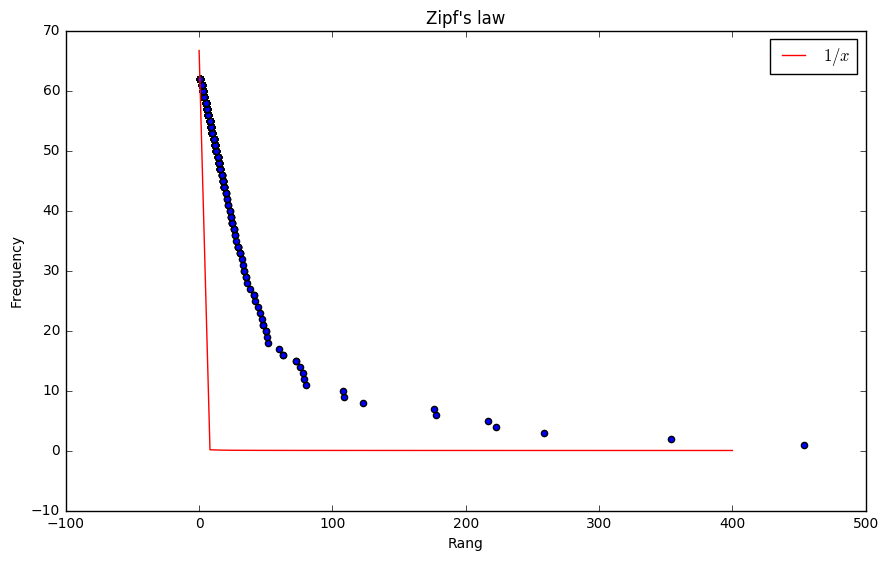

In [109]:
# теперь построим графики
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
z = np.linspace(0.015, 400)

axes.plot(z, 1/z, 'r')

axes.set_xlabel('Rang')
axes.set_ylabel('Frequency')
axes.set_title("Zipf's law")
axes.legend([r'$1/x$'], loc = 0)

plt.scatter(x, y)
plt.show()

### Синтаксический анализ

In [123]:
with open('sentences.txt') as f:
    text = f.read()
    
print(text)

В Кремле не увидели провокации в выборе конкурсантки на «Евровидение» .

Замену маткапитала выплатами обсудят в Госдуме 23 марта .

Совет Евросоюза продлил антироссийские санкции на полгода .

Тимошенко заявила, что Украиной управляют извне .

Радикалы зажгли файеры возле офиса украинской «дочки» Сбербанка .

Россия и Китай договорились о постройке новой железной дороги .

Собянин открыл новый парк и детскую площадку . 



Запуск SyntaxNet из Docker: 

In [ ]:
! cat sentences.txt | docker run --rm -i inemo/syntaxnet_rus > data.conll

Представление результатов с помощью Python:

In [121]:
from nltk import DependencyGraph
import codecs

processed_sentences = []
sentence = []
for line in codecs.open('data.conll', 'r', 'utf-8'):
    if len(line) == 1:
        processed_sentences.append(sentence)
        sentence = []
    else:
        word = line.split("\t")
        sentence.append(word)

deps = []
for sentence in processed_sentences:
    s = u""
    for line in sentence:
        s += u"\t".join(line) + u'\n'
    deps.append(s)

for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
    for triple in graph.triples():
        for e in triple:
            print(e[0] if isinstance(e, tuple) else e,)
        print()
    print()
    tree = graph.tree()
    print(tree.pretty_print())

увидели
nmod
Кремле

Кремле
case
В

увидели
neg
не

увидели
dobj
провокации

провокации
nmod
выборе

выборе
case
в

выборе
dobj
конкурсантки

конкурсантки
nmod
«Евровидение»

«Евровидение»
case
на

увидели
punct
.


        увидели                             
  _________|____________                     
 |   |     |        провокации              
 |   |     |            |                    
 |   |     |          выборе                
 |   |     |      ______|____________        
 |   |     |     |              конкурсантки
 |   |     |     |                   |       
 |   |   Кремле  |             «Евровидение»
 |   |     |     |                   |       
 не  .     В     в                   на     

None
обсудят
dobj
Замену

Замену
nmod
маткапитала

обсудят
nmod
выплатами

обсудят
nmod
Госдуме

Госдуме
case
в

обсудят
nmod
23

23
nmod
марта

обсудят
punct
.


                обсудят                
     ______________|________________    
    |      |     Замену   Госдуме   23 

In [122]:
for sent_dep in deps:
    verbs = {}
    for t in sent_dep.split('\n'):
        if len(t) > 1:
            splt = t.split('\t')
            if splt[3] == 'VERB':
                verbs[splt[0]] = [splt[1]]
    sent_split = sent_dep.split('\n')
    sent = [i.split('\t') for i in sent_split if len(i) > 1]
    for splt in sent:
        if splt[7] in ['dobj', 'nsubj']:
            if splt[6] in verbs:
                verbs[splt[6]].append(splt[1])
                
                
    for t in verbs.values():
        for elem in t:
            print(elem)
        print()

увидели
провокации

обсудят
Замену

продлил
Совет
санкции

управляют
Украиной

зажгли
Радикалы
файеры

договорились
Россия

открыл
Собянин
парк



### Задание 5.

1. Исправьте данный код, чтобы он учитывал однородные члены при разборе предложения.
2. Найдите в тексте про Винни Пуха все SVO-тройки, где субъектом выступает Сова.

In [274]:
# решение
#1. Исправьте данный код, чтобы он учитывал однородные члены при разборе предложения.

processed_sentences = []
sentence = []
for line in codecs.open('data.conll', 'r', 'utf-8'):
    if len(line) == 1:
        processed_sentences.append(sentence)
        sentence = []
    else:
        word = line.split("\t")
        sentence.append(word)

deps = []
for sentence in processed_sentences:
    s = u""
    for line in sentence:
        s += u"\t".join(line) + u'\n'
    deps.append(s)

for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
    tree = graph.tree()
    
for sent_dep in deps:
    verbs = {}
    for t in sent_dep.split('\n'):
        if len(t) > 1:
            splt = t.split('\t')
            if splt[3] == 'VERB':
                verbs[splt[0]] = [splt[1]]
    sent_split = sent_dep.split('\n')
    sent = [i.split('\t') for i in sent_split if len(i) > 1]
    for splt in sent:
        if splt[7] in ['dobj', 'nsubj']:
            if splt[6] in verbs:
                verbs[splt[6]].append(splt[1])
                
                
    
    # теперь обработка однородных членов предложения:
    # если текущее слово конъюктивно (conj) связано с субъектом или объектом глагола - добавляем его в "тройку"
        if splt[7] == 'conj':
            n = int(splt[-4])-1 #номер предка
            if sent[n][-3] in ['dobj', 'nsubj']: # если предок - субъект или объект,
                for verb, dops in verbs.items(): # проходим по словарю, находим ключ-глагол предка и добавляем
                    if (sent[n][1]) in dops:     # текущее слово к значеням
                        verbs[verb].append('и '+splt[1])
                          
            
        
    print()                
    for t in verbs.values():
        for elem in t:
            print(elem)
        print()


увидели
провокации


обсудят
Замену


продлил
Совет
санкции


управляют
Украиной


зажгли
Радикалы
файеры


договорились
Россия
и Китай


открыл
Собянин
парк
и площадку



In [211]:
#2. Найдите в тексте про Винни Пуха все SVO-тройки, где субъектом выступает Сова.
# сперва необходимо предобработать текст: отделить знаки окончания предложения пробелом

with open('Vinni-Puh.txt') as f:
    raw = f.read()
    
text = raw.replace(".", " .").replace("!", " .").replace("?", " .").replace("...", " .")

# запишем полученный текст в файл
with open('Vinni-Puh1.txt', 'w') as f:
    f.write(text)

In [273]:
processed_sentences = []
sentence = []
for line in codecs.open('data2.conll', 'r', 'utf-8'):
    if len(line) == 1:
        processed_sentences.append(sentence)
        sentence = []
    else:
        word = line.split("\t")
        sentence.append(word)

deps = []
res = []
for sentence in processed_sentences:
    s = u""
    for line in sentence:
        s += u"\t".join(line) + u'\n'
    deps.append(s)

for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
    tree = graph.tree()
    
for sent_dep in deps:    
    verbs = {}
    for t in sent_dep.split('\n'):
        if len(t) > 1:
            splt = t.split('\t')
            if splt[1] == 'Сова':
                n = int(splt[6]) # номер глагола, с которым связана Сова
                sent_split = sent_dep.split('\n')
                sent = [i.split('\t') for i in sent_split if len(i) > 1]
                verbs[str(n)] = [sent[n-1][1]]
                verbs[str(n)].append('Сова')
    if verbs:
        sent_split = sent_dep.split('\n')
        sent = [i.split('\t') for i in sent_split if len(i) > 1]
        for splt in sent:
            if splt[7] =='dobj':
                #print(verbs, splt[6], splt[1])
                if splt[6] in verbs:
                    verbs[splt[6]].append(splt[1])
            

        for t in verbs.values():
            for elem in t:
                print(elem)
            print()

жила
Сова
что
Лесу,

жила
Сова

Открывай
Сова
Сова

открылась,
Сова

сказала
Сова
Сова

говорила
Сова
что

говорила
Сова

сказала
Сова
что

сказала
Сова

умеет
Сова
что

—
Сова

ответила
Сова
Сова

удивилась
Сова

сказала
Сова

мусолила
Сова
кончик

писать…
Сова

заметила
Сова
Сова

пояснила
Сова

сказала
Сова

кричала
Сова
Сова

сказала
Сова
Сова

сказала
Сова
Сова

сказала
Сова

рассказывала
Сова

проснувшийся,
Сова
Сова

может
Сова

сказала
Сова

пояснила
Сова
Сова

пояснила
Сова
Сова

порядке,
Сова

глупость,
Сова

Сова
Сова
его

отвечала
Сова
Сова

улетела
Сова

уселась
Сова

ног,
Сова

прилетела
Сова
Сова

сказала
Сова
Сова

сказала
Сова

попыталась
Сова

ожидает,
Сова

почувствовала,
Сова

беседовала
Сова
это,

повторила
Сова
Сова

.
Сова

ответила
Сова
малыш

